Shape: (569, 32)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  label label_name  
0                  0.11890      0  malignant  
1                  0.08902      0  malignant  
2                  0.08758      0  malignant  
3                  0.17300      0  malignant  
4                  0.07678      0  malignant

label_name
benign       357
malignant    212
Name: count, dtype: int64

Nulls per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
label_name                 0
dtype: int64

Duplicate rows: 0


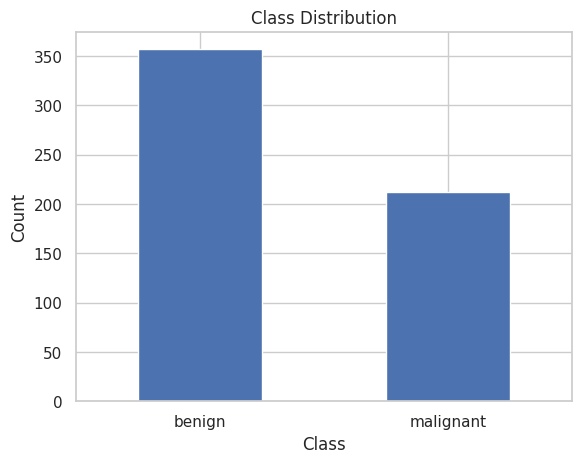

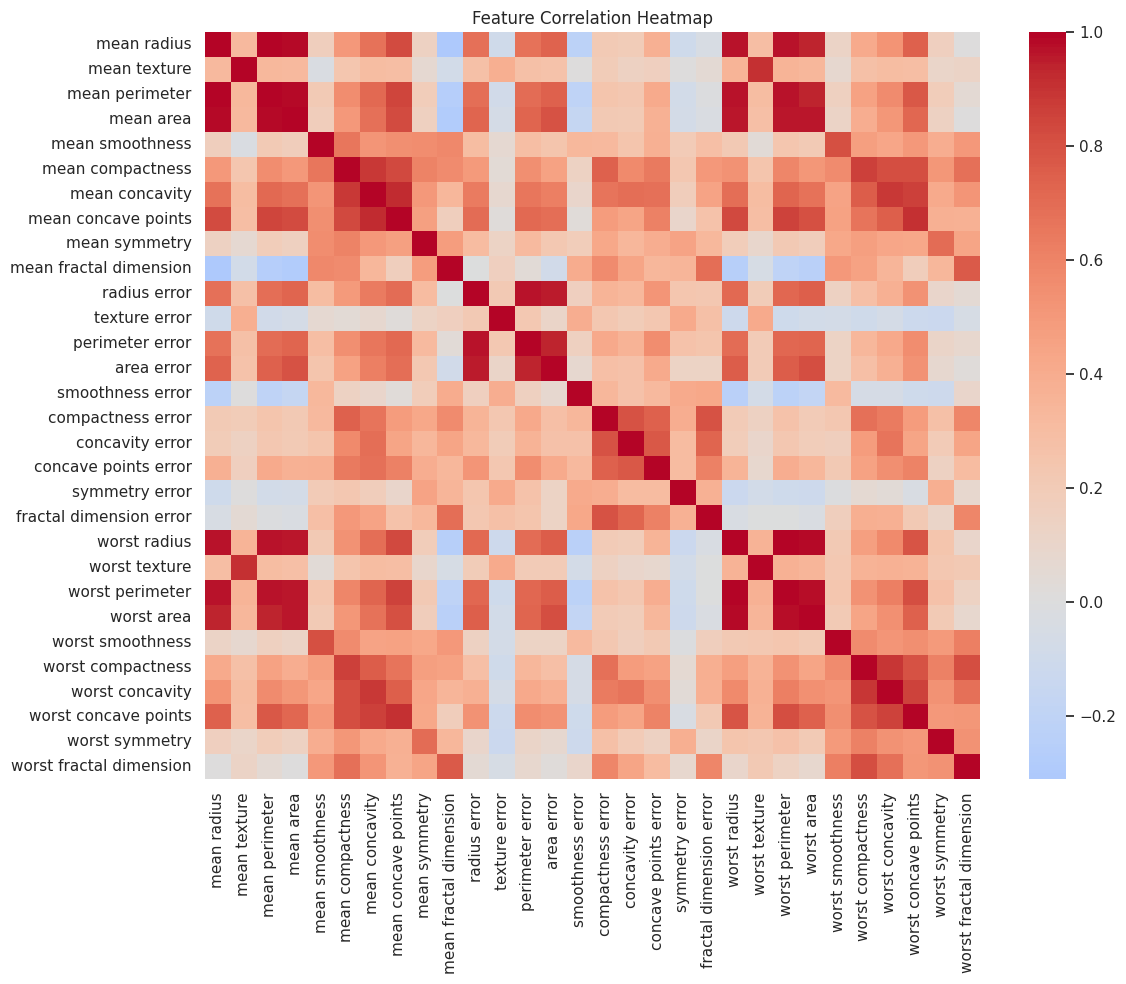

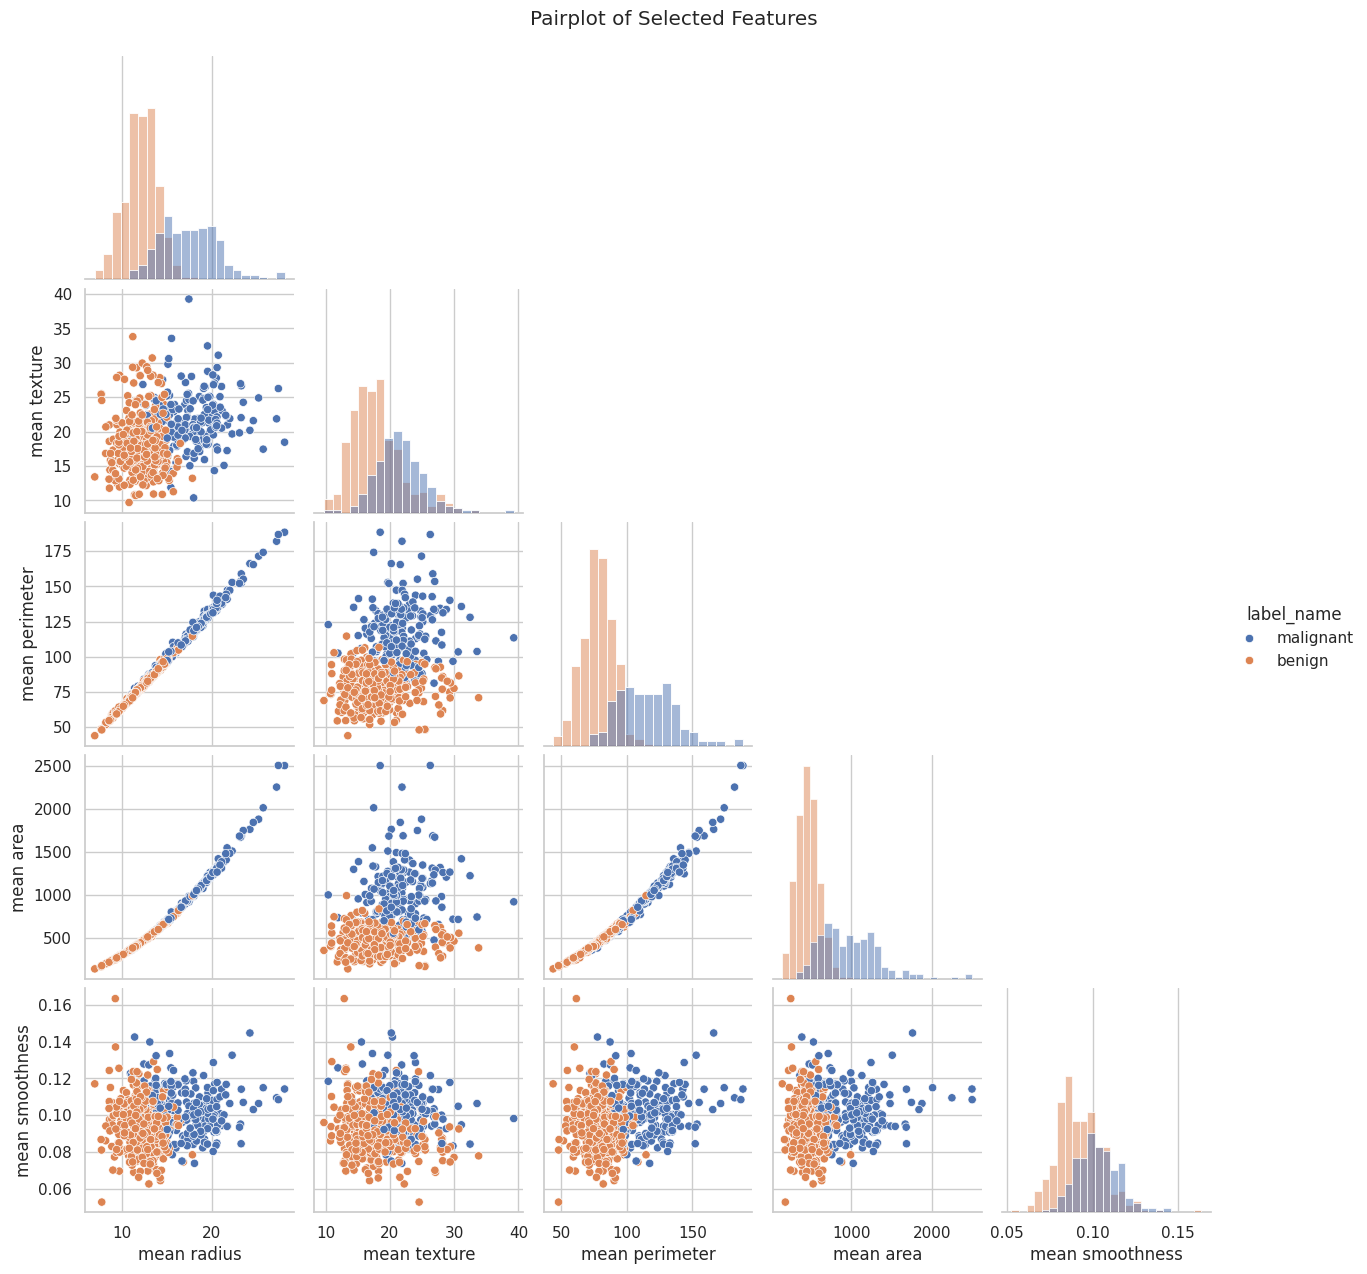

model  acc_mean  prec_mean  recall_mean   f1_mean  roc_auc_mean
0        LogReg  0.978022   0.979472     0.985965  0.982544      0.995872
1       SVM-RBF  0.969231   0.972750     0.978947  0.975615      0.995562
3  RandomForest  0.964835   0.975831     0.968421  0.971765      0.990351
4           kNN  0.962637   0.956236     0.985965  0.970665      0.988596
2  DecisionTree  0.916484   0.952811     0.912281  0.931901      0.917905

model  accuracy  precision    recall        f1   roc_auc
0        LogReg  0.982456   0.986111  0.986111  0.986111  0.995370
1       SVM-RBF  0.982456   0.986111  0.986111  0.986111  0.995040
3  RandomForest  0.947368   0.958333  0.958333  0.958333  0.993717
4           kNN  0.973684   0.960000  1.000000  0.979592  0.988426
2  DecisionTree  0.912281   0.955882  0.902778  0.928571  0.915675

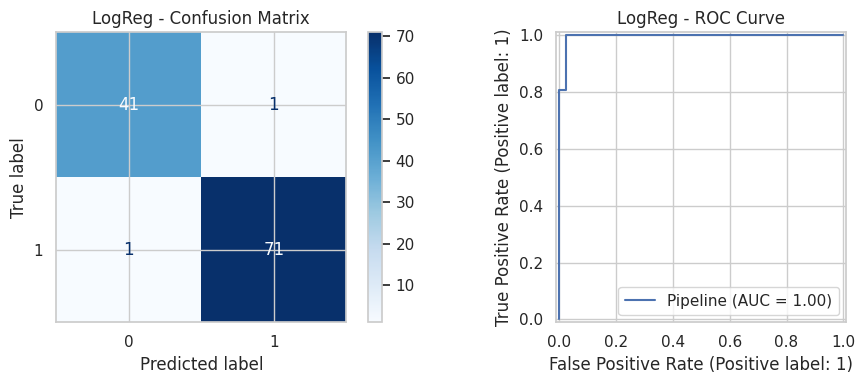

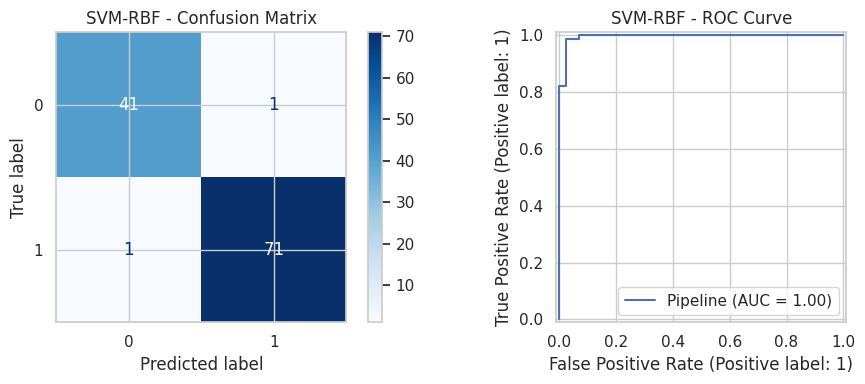

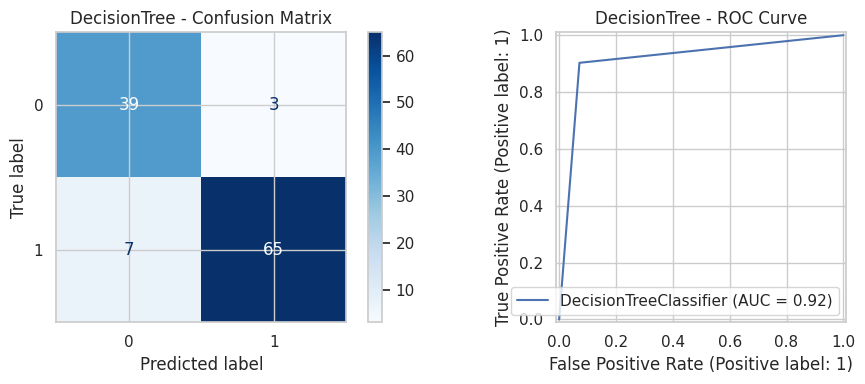

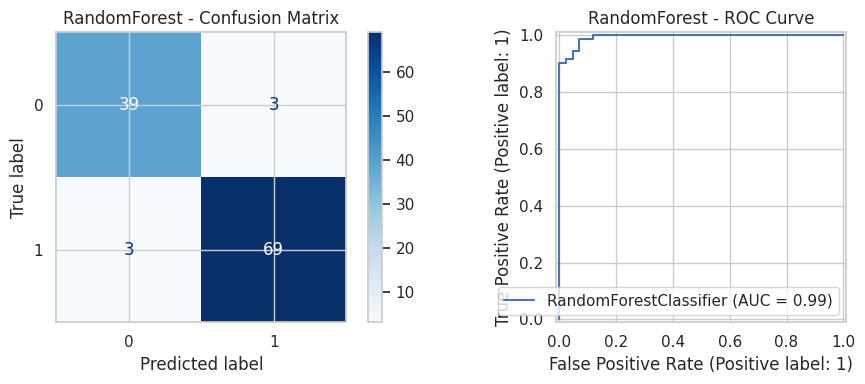

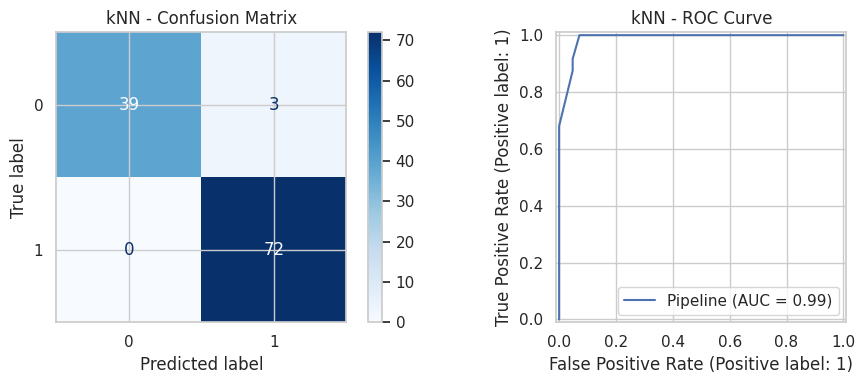

Prediction: 1  (1=malignant, 0=benign),  probability malignant = 0.990


In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set(context="notebook", style="whitegrid")
pd.set_option("display.max_columns", None)



# Dataset loading
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()  # includes features + target
df.rename(columns={"target": "label"}, inplace=True)

# Map numeric target to readable classes
target_names = dict(enumerate(data.target_names))
df["label_name"] = df["label"].map(target_names)

print("Shape:", df.shape)
display(df.head())
display(df["label_name"].value_counts())


# Check duplicates & nulls
print("Nulls per column:\n", df.isnull().sum().sort_values(ascending=False))
print("\nDuplicate rows:", df.duplicated().sum())


# Class distribution
ax = df["label_name"].value_counts().plot(kind="bar", rot=0)
ax.set_title("Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.show()


# Correlation heatmap (numeric features only)
corr = df.drop(columns=["label", "label_name"]).corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


# Quick pairwise exploration for a few most informative features
features_to_plot = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness"]
sns.pairplot(
    df[features_to_plot + ["label_name"]],
    hue="label_name", diag_kind="hist", corner=True
)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


# Train/Test Split
X = df.drop(columns=["label", "label_name"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape


# Define models (you only need 2+, we include 5 for comparison)
models = {
    "LogReg": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=500, n_jobs=None))
    ]),
    "SVM-RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, kernel="rbf", C=1.0, gamma="scale", random_state=42))
    ]),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "kNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=7))
    ]),
}


# Quick CV scores to compare models before final fit
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

summary = []
for name, model in models.items():
    scores = cross_validate(
        model, X_train, y_train, cv=cv,
        scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
        n_jobs=-1
    )
    row = {
        "model": name,
        "acc_mean": scores["test_accuracy"].mean(),
        "prec_mean": scores["test_precision"].mean(),
        "recall_mean": scores["test_recall"].mean(),
        "f1_mean": scores["test_f1"].mean(),
        "roc_auc_mean": scores["test_roc_auc"].mean(),
    }
    summary.append(row)

cv_results = pd.DataFrame(summary).sort_values(by="roc_auc_mean", ascending=False)
display(cv_results)

# Fit & evaluate on test set
def evaluate(model, X_test, y_test, name="model"):
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    y_pred = model.predict(X_test)
    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    }
    return metrics, y_pred, y_prob

test_rows = []
fitted = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted[name] = model
    m, y_pred, y_prob = evaluate(model, X_test, y_test, name)
    test_rows.append(m)

test_results = pd.DataFrame(test_rows).sort_values(by="roc_auc", ascending=False)
display(test_results)



# Confusion matrix plots
for name, model in fitted.items():
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax[0], cmap="Blues")
    ax[0].set_title(f"{name} - Confusion Matrix")
    # ROC
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1])
        ax[1].set_title(f"{name} - ROC Curve")
    else:
        ax[1].axis("off")
    plt.tight_layout()
    plt.show()

# Simple tuning example
rf_tuned = RandomForestClassifier(
    n_estimators=600,
    max_depth=12,
    min_samples_split=4,
    random_state=42
)
rf_tuned.fit(X_train, y_train)

# Evaluate tuned RF
m_tuned, y_pred_tuned, y_prob_tuned = evaluate(rf_tuned, X_test, y_test, "RandomForest_Tuned")
pd.DataFrame([m_tuned])

#Inference on a single new example using your best model (replace with your chosen model)
best_model = fitted["RandomForest"]  # or "SVM-RBF", etc.

# Create a synthetic sample by taking a median row and tweaking
sample = X_train.median(numeric_only=True).to_dict()
sample_df = pd.DataFrame([sample], columns=X.columns)

pred = best_model.predict(sample_df)[0]
proba = best_model.predict_proba(sample_df)[0,1]
print(f"Prediction: {pred}  (1=malignant, 0=benign),  probability malignant = {proba:.3f}")



In [3]:
import joblib
joblib.dump(best_model, "breast_cancer_best_model.joblib")
# FastAPI sketch
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()
clf = joblib.load("breast_cancer_best_model.joblib")
feature_order = list(X.columns)  # persist this order (e.g., save to JSON)

@app.post("/predict")
def predict(payload: dict):
    # payload keys must match feature_order
    X_new = pd.DataFrame([payload], columns=feature_order)
    proba = float(clf.predict_proba(X_new)[0,1])
    pred  = int(proba >= 0.5)
    return {"prediction": pred, "prob_malignant": proba}